## Assignment 1 | Data Exploration
---
### Special Topics in Information Systems course | Faculty of Engineering | AlexU
#### Iris Dataset 
---

### 1. import dataset


In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt


In [2]:
data = datasets.load_iris()

In [3]:
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [4]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = y.reshape(-1, 1)

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
result = cosine_similarity(X= x.T)

In [8]:
result

array([[1.        , 0.97826314, 0.9485315 , 0.89734594],
       [0.97826314, 1.        , 0.87186713, 0.80926193],
       [0.9485315 , 0.87186713, 1.        , 0.98338483],
       [0.89734594, 0.80926193, 0.98338483, 1.        ]])

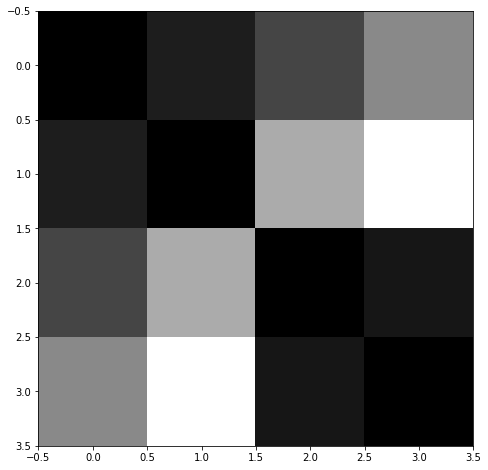

In [9]:
import matplotlib.cm as cm
fig = plt.figure(figsize=(12, 8))
plt.imshow(result, interpolation='None', cmap=cm.gray_r)
plt.show()

From the above plot we can see that there is high correlation between:
- attributes 1 and 2 (sepal length & sepal width)
- attributes 3 and 4 (petal length & petal width)

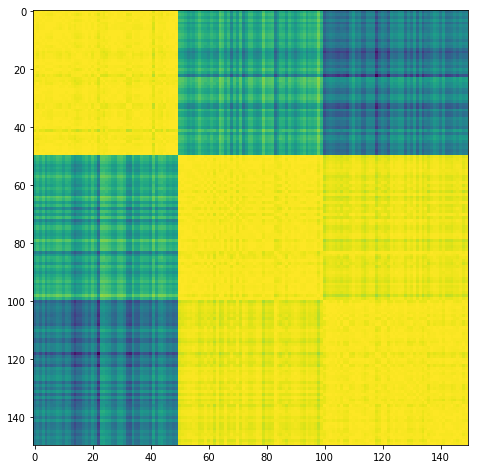

In [18]:
result_2 = cosine_similarity(X=x)
fig = plt.figure(figsize=(12, 8))
plt.imshow(result_2, interpolation='None')
plt.show()

As we can see from the above image, there's a  high simliarity between class 2 (Virginica) and class 3 (Versicolour), where as class  1 (Setosa) differes from the others. 

### 2. Visualization
---

In [19]:
#
class_dict = {0: "Setosa", 1: "Virginica", 2:"Versicolour"}

#### 1. Plot the X data for each class alone.

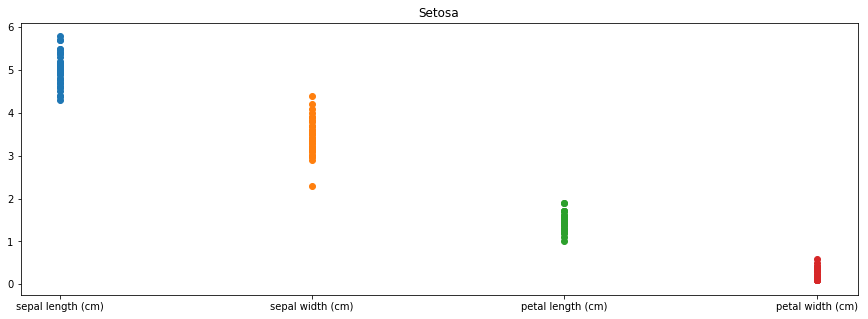

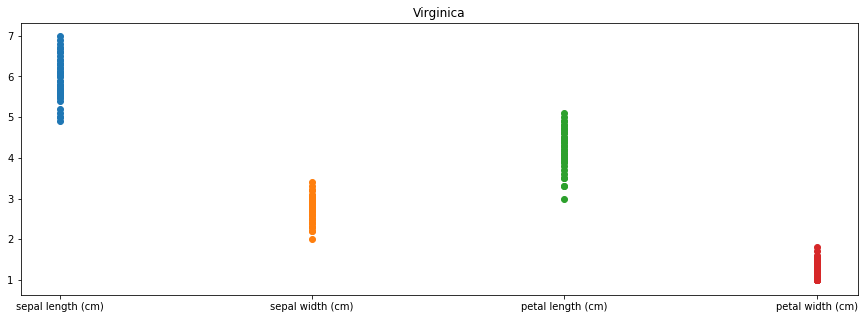

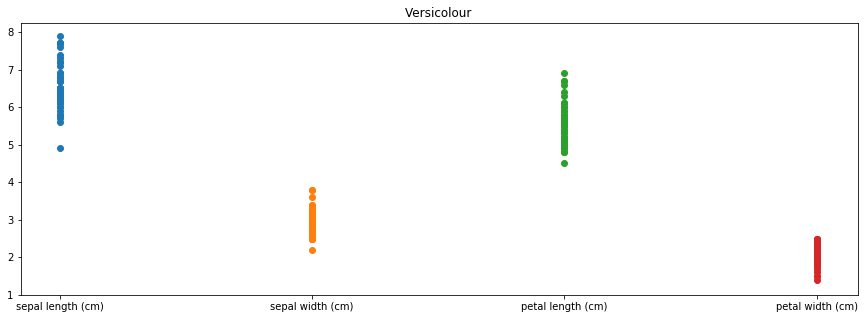

In [20]:
def plot_scatter(class_num):
    inx = np.where(y == class_num)[0]
    data = x.iloc[inx]
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(data.columns):
        plt.title(class_dict[class_num])
        plt.scatter([i]*len(data[col]), data[col])
        plt.xticks(range(4), data.columns.tolist())
    plt.show()
        

for i in range(3):
    plot_scatter(i)

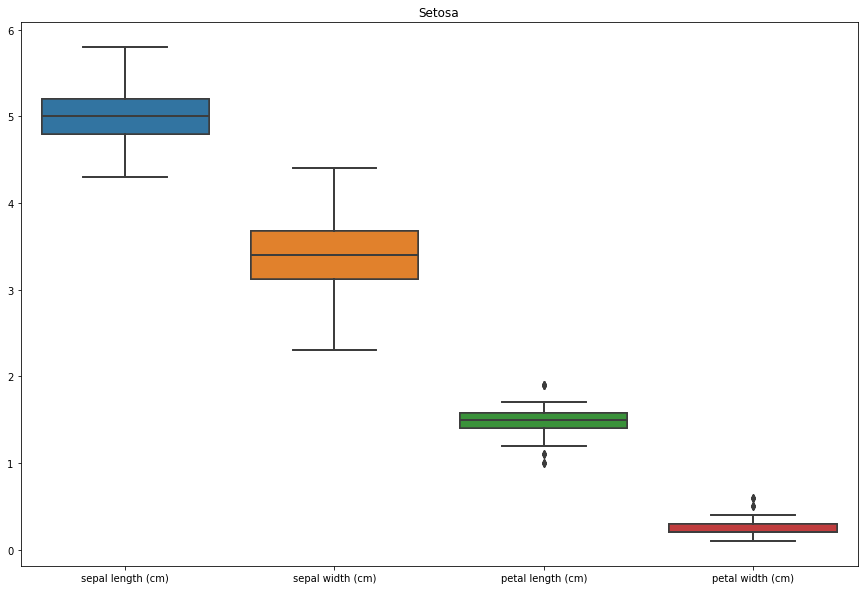

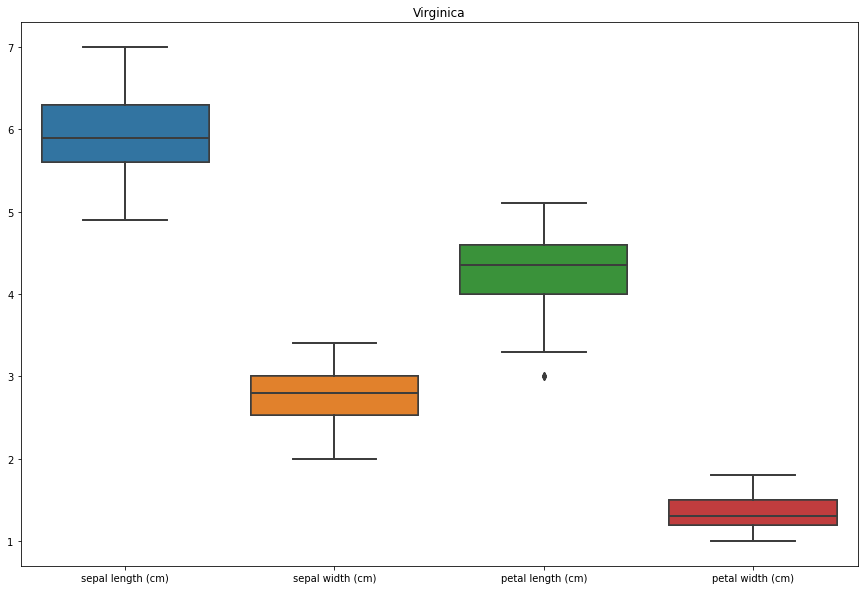

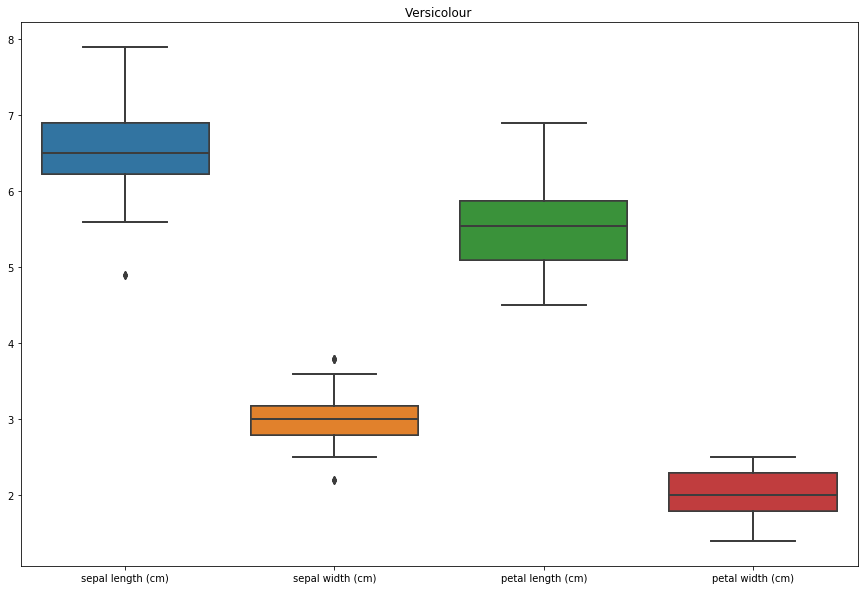

In [124]:
import seaborn as sb
def plot_box_plot(class_num):
    inx = np.where(y == class_num)[0]
    data = x.iloc[inx]
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(data.columns):
        plt.title(class_dict[class_num])
        sb.boxplot(data=data)
    plt.show()
        

for i in range(3):
    plot_box_plot(i)


##### 2. Plot the histogram for each class.

In [74]:
def plot_iris(class_number, color='green', bins_num=10):
    print("Class:", class_dict[class_number])
    n_bins = bins_num
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    ax0, ax1, ax2, ax3 = axes.flatten()
    axes = [ax0, ax1, ax2, ax3]

    for idx, val in enumerate(x.keys()):
        data = x[y==class_number][val]
        meanval = np.array(data).mean()
        stdval = np.array(data).std()
        axes[idx].hist(data, n_bins, histtype='bar', color=color)
        axes[idx].legend(prop={'size': 10})
        label = r" $\mu={:0.2}, std={:0.2} $" .format(meanval,stdval)
        axes[idx].set_title(val + label)

    fig.tight_layout()
    plt.show()

Class: Setosa


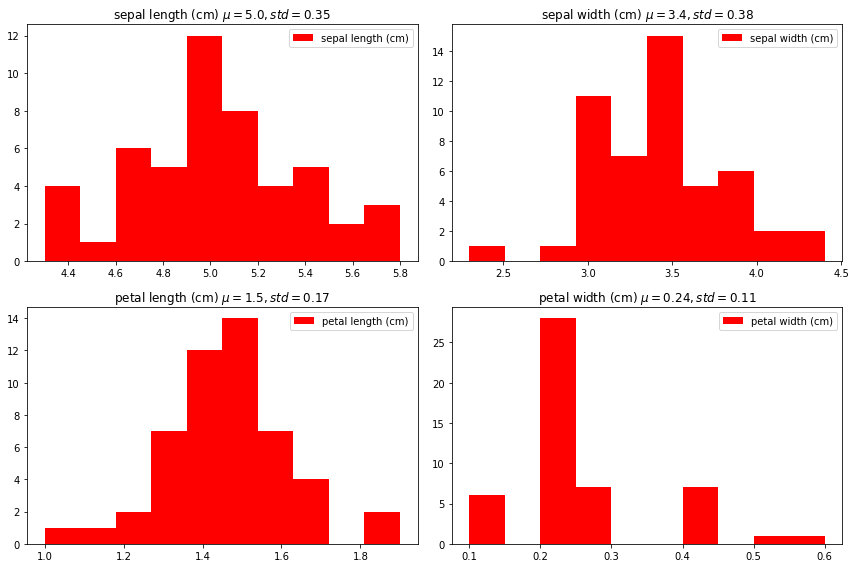

In [75]:
plot_iris(0, 'red')

The features distribution are approximately normal, except for the `petal width` which also exhibits lower variance (std =0.11)

Class: Virginica


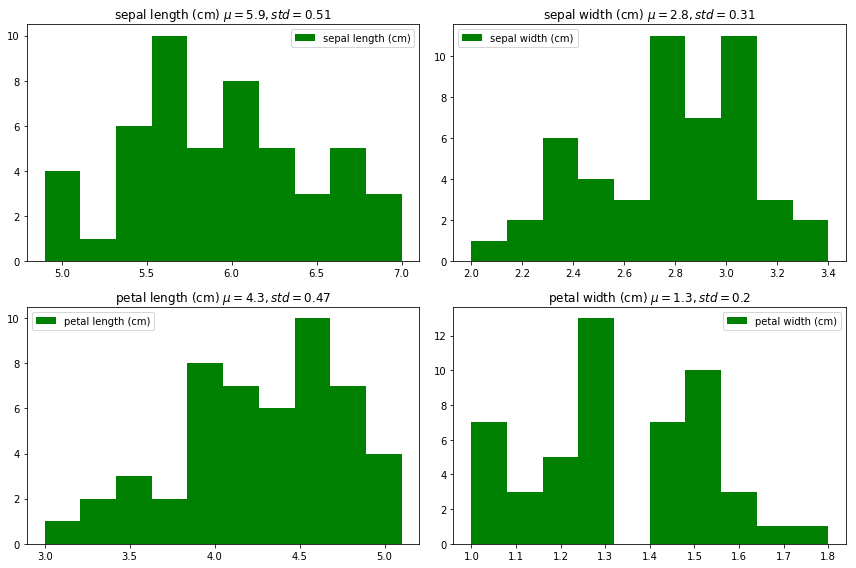

In [76]:
plot_iris(1, 'green')

In this class, the attribute values are more skewed, and again `petal width` has the lowest standatd deviation.

Class: Versicolour


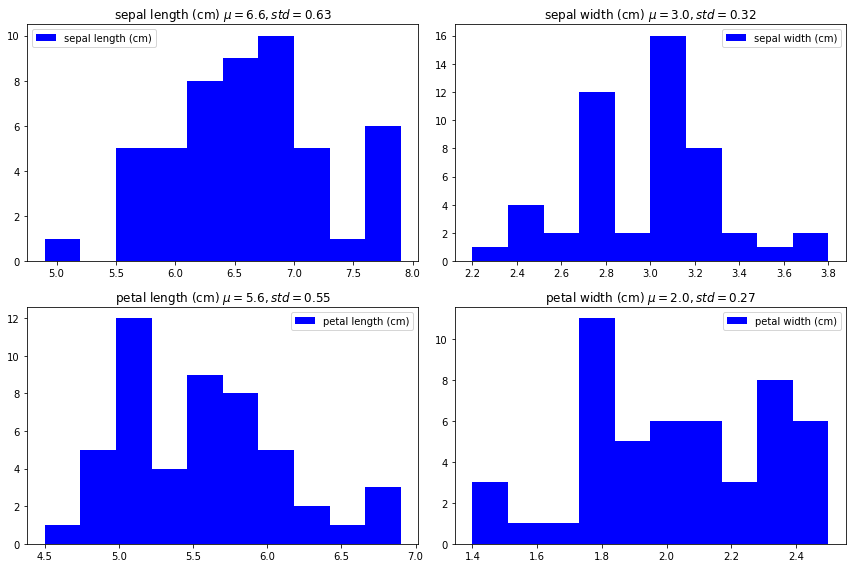

In [77]:
plot_iris(2, 'blue')

The ` width` has higher variance in this class than others. `septal lenghts`is more close to normal than other attributes

In [114]:
def plot_iris_all_feature(class_num, bins_num=8):
    n_bins = bins_num
    print("Class:", class_dict[class_num])
    fig, axis = plt.subplots(figsize=(12, 8))

    colors = ['red', 'blue', 'tan', 'lime']
    labels = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    
    hist = axis.hist(x[y==class_num].values, n_bins, histtype='bar', color=colors, label=labels)
    axis.legend(prop={'size': 10})
    
    fig.tight_layout()
    plt.show()

Class: Setosa


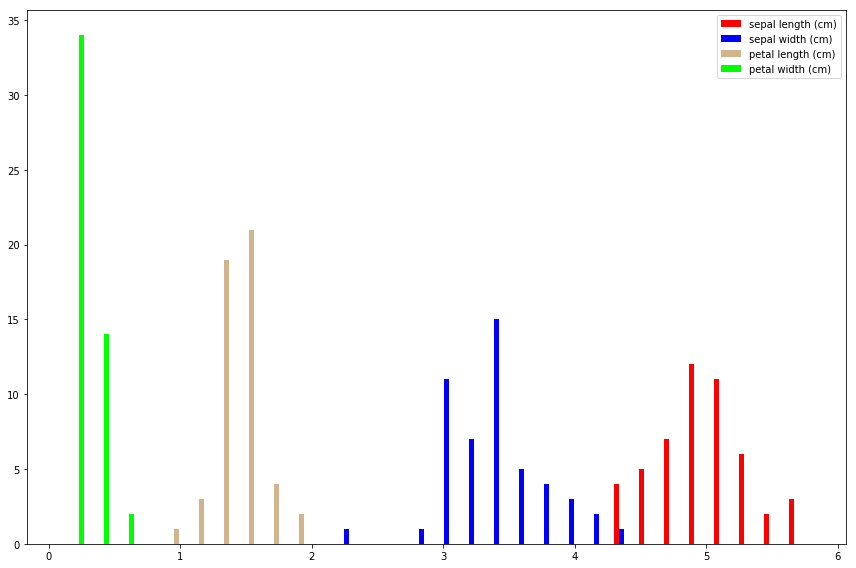

In [115]:
plot_iris_all_feature(0,30)

Class: Virginica


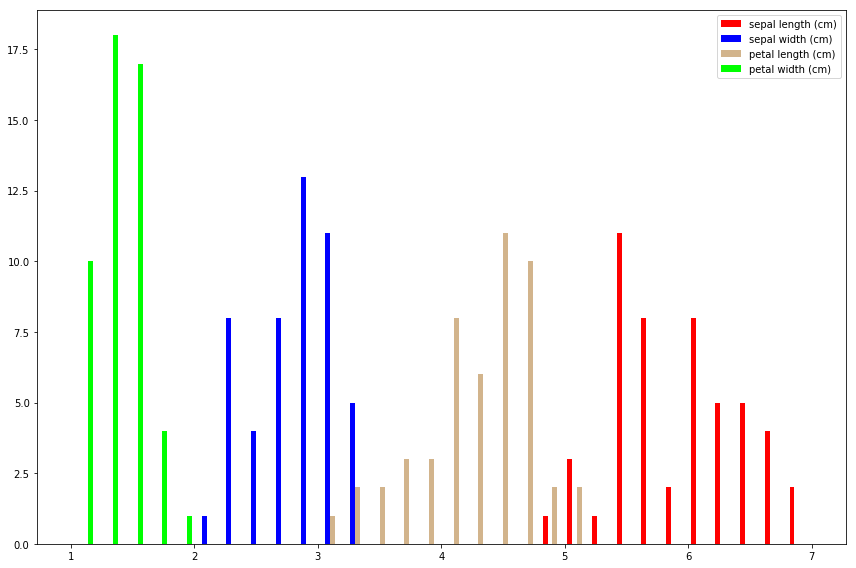

In [116]:
plot_iris_all_feature(1,30)

Class: Versicolour


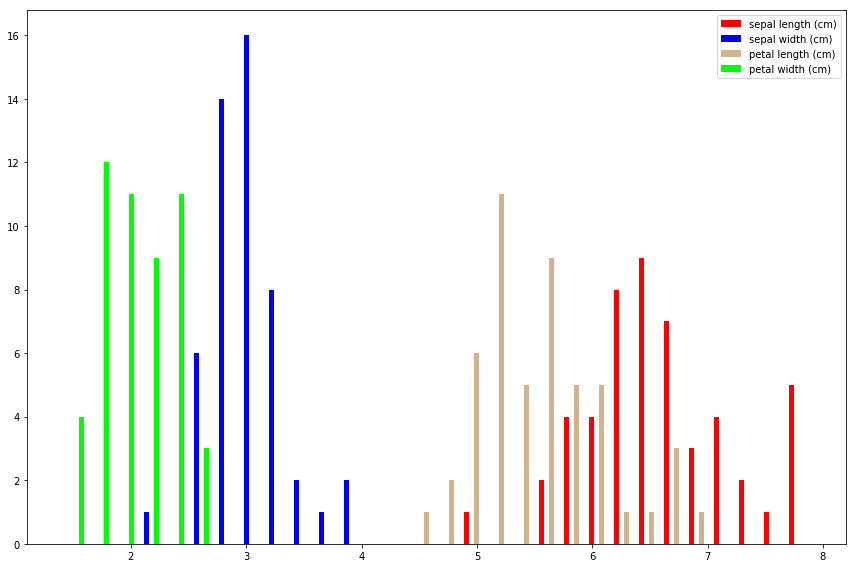

In [117]:
plot_iris_all_feature(2,30)

##### 3. Use scatter plot to plot every 2 attributes together.

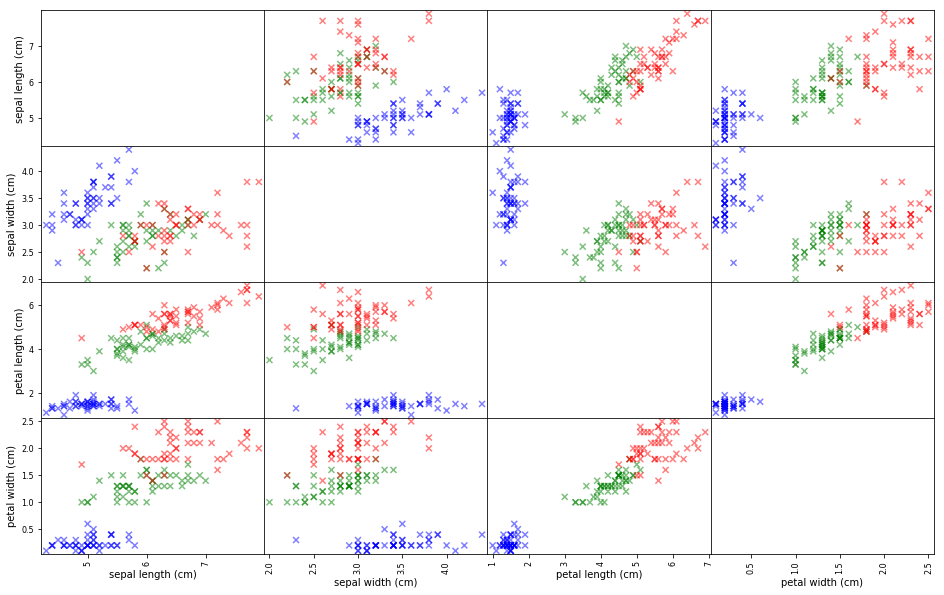

In [20]:
cls =['blue']*50 +['green']*50 + ['red']* 50
sctr = pd.plotting.scatter_matrix(x, figsize=(16,10), marker='x', color=cls, diagonal="kda")
#

There are clear correlations between:
- petal length and petal width
- petal length and sepal length

Also, the petal properties better separate the classes than the sepal properties. The `petal length` against the `petal width` scatter plot, for example, clearly separate the three classes.

##### 4. Use 3D scatter plot to plot every 3 attributes together

In [23]:
import matplotlib._color_data as mcd
colors = list(mcd.TABLEAU_COLORS)
    
def plod_3d(f1, f2, f3, y):
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for i in range(len(y)):
        if y[i]==0:
            ax.scatter(x[f1][i], x[f2][i], x[f3][i], c=colors[y[i][0]], marker='o')
        elif y[i]==1:
            ax.scatter(x[f1][i], x[f2][i], x[f3][i], c=colors[y[i][0]], marker='+')
        elif y[i]==2:
            ax.scatter(x[f1][i], x[f2][i], x[f3][i], c=colors[y[i][0]], marker='x')
        
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_zlabel(f3)

    plt.show()

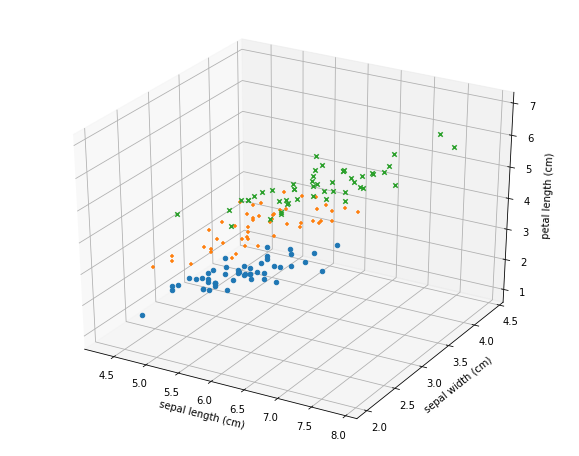

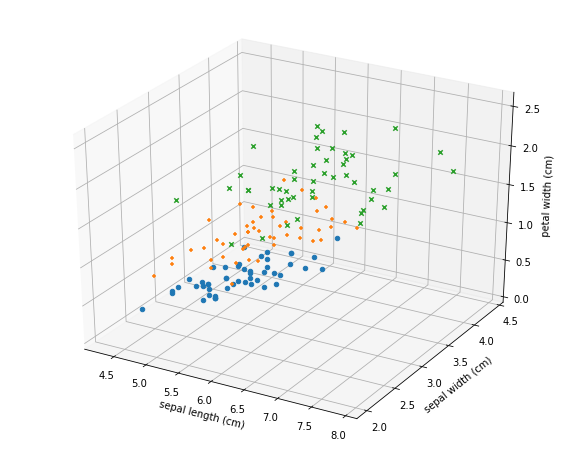

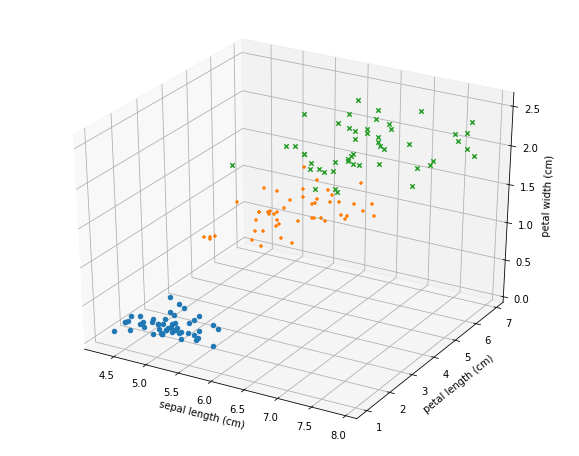

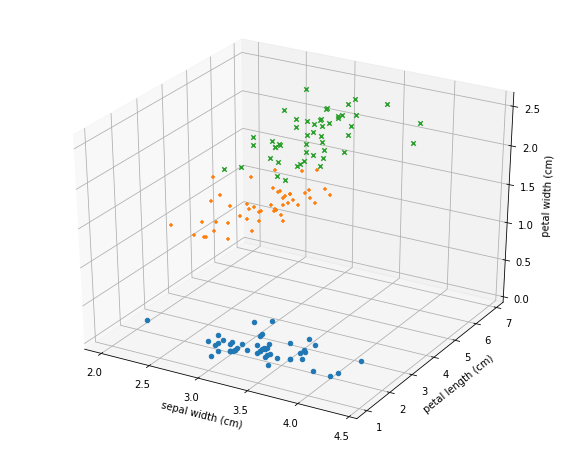

In [24]:
from mpl_toolkits.mplot3d import Axes3D

for idx1 in range(len(x.keys())):
    for idx2 in range(idx1+1, len(x.keys())):
        for idx3 in range(idx2+1, len(x.keys())):
            plod_3d(x.keys()[idx1], x.keys()[idx2], x.keys()[idx3], y)


Generally, in higher dimensions the classes are more separable; we can see how classes are more cluttered and can be easily spot together in the 3d space. Also, the last plot is prefered to infer the type of the classes.